In [1]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import quandl

In [3]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
quandl.ApiConfig.api_key = "yozoBysCQGaxfpCUwa1t"

In [5]:
df=quandl.get("EOD/AAPL")

In [6]:
df

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.600,487.350,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0
2013-09-04,499.56,502.240,496.280,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0
2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0
2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0
2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2013-09-03 to 2017-12-28
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1090 non-null   float64
 1   High        1090 non-null   float64
 2   Low         1090 non-null   float64
 3   Close       1090 non-null   float64
 4   Volume      1090 non-null   float64
 5   Dividend    1090 non-null   float64
 6   Split       1090 non-null   float64
 7   Adj_Open    1090 non-null   float64
 8   Adj_High    1090 non-null   float64
 9   Adj_Low     1090 non-null   float64
 10  Adj_Close   1090 non-null   float64
 11  Adj_Volume  1090 non-null   float64
dtypes: float64(12)
memory usage: 110.7 KB


In [8]:
df.shape

(1090, 12)

In [9]:
(df[['Dividend']]>0).value_counts()

Dividend
False       1073
True          17
dtype: int64

In [10]:
df['HL_PCT']=(df['Adj_High']-df['Adj_Low'])/df['Adj_Close']*100.0
df['PCT_change']=(df['Adj_Close']-df['Adj_Open'])/df['Adj_Open']*100.0

In [11]:
df.head(10)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,,,,,,,,,,,
2013-09-03,493.1000,500.6000,487.35,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0,2.711941,-0.916650
2013-09-04,499.5600,502.2400,496.28,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0,1.195129,-0.173953
2013-09-05,500.2500,500.6800,493.64,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0,1.421447,-0.995502
2013-09-06,498.4400,499.3800,489.95,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0,1.892738,-0.044138
2013-09-09,505.0000,507.9200,503.48,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0,0.877176,0.231683
2013-09-10,506.2000,507.4500,489.50,494.640,26542700.0,0.0,1.0,16.034611,16.074207,15.505615,15.668432,743195600.0,3.628902,-2.283682
2013-09-11,467.0101,473.6900,464.81,467.710,32096300.0,0.0,1.0,14.793215,15.004810,14.723524,14.815385,898696400.0,1.898612,0.149868
2013-09-12,468.5000,475.4000,466.01,472.690,14430400.0,0.0,1.0,14.840410,15.058977,14.761535,14.973134,404051200.0,1.986503,0.894344
2013-09-13,469.3402,471.8292,464.70,464.900,10672700.0,0.0,1.0,14.867024,14.945867,14.720039,14.726374,298835600.0,1.533491,-0.946051


<AxesSubplot:>

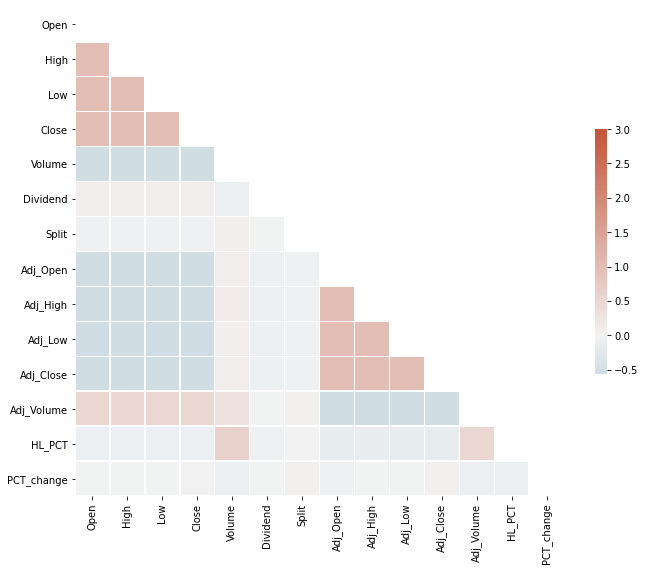

In [12]:
corr = df.corr()
    
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0, square=True, linewidth=.5, cbar_kws={"shrink": .5})

In [13]:
df = df[['Adj_Close', 'Adj_Volume','PCT_change', 'HL_PCT']]

In [14]:
df.shape

(1090, 4)

<AxesSubplot:xlabel='Date'>

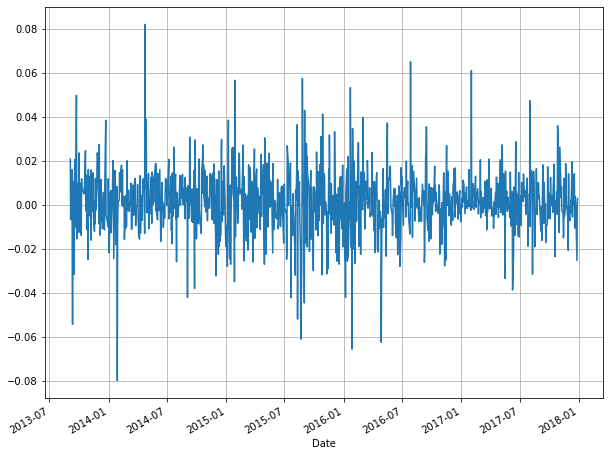

In [15]:
df['Adj_Close'].pct_change().plot(figsize=(10,8),grid=True)

In [16]:
df.corr()

,Adj_Close,Adj_Volume,PCT_change,HL_PCT
Adj_Close,1.000000,-0.553474,0.025237,-0.137288
Adj_Volume,-0.553474,1.000000,-0.079556,0.512480
PCT_change,0.025237,-0.079556,1.000000,-0.060349
HL_PCT,-0.137288,0.512480,-0.060349,1.000000


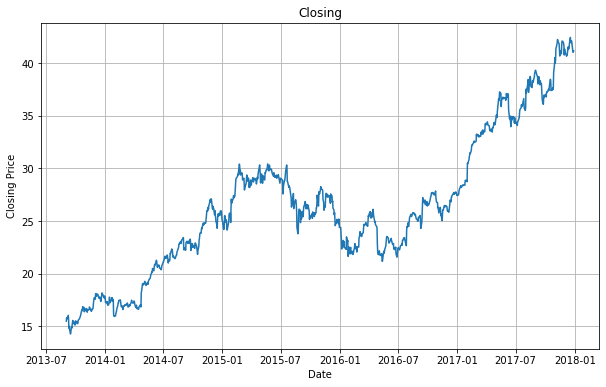

In [17]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(df['Adj_Close'])

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing')
plt.show()

In [24]:
print('shape of df', df.shape )
label=df["Adj_Close"].shift(-10)

print("label having null", label.isna().sum())
print("shape of label", label.shape)

#print(df['Adj_Close'])
#print(label)

label.dropna(inplace=True)
y=np.array(label)

print('shape of y after null', y.shape)

x=(df[['Adj_Volume','HL_PCT','PCT_change']])
print('shape of x', x.shape)
x_lately=x[-10:] 
x=x[:-10]
print("new shape of x", x.shape)



shape of df (1090, 4)
label having null 10
shape of label (1090,)
shape of y after null (1080,)
shape of x (1090, 3)
new shape of x (1080, 3)


In [25]:
print(y.shape)
print(x.shape)

(1080,)
(1080, 3)


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=41)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
normal=MinMaxScaler().fit(x_train)
x_train=normal.transform(x_train)
x_test=normal.transform(x_test)
x_lately=normal.transform(x_lately)

In [30]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
result=model.score(x_test,y_test)

In [32]:
intercept=model.intercept_
coefficient=model.coef_
print(intercept)
print(coefficient)

30.598998615852057
[-36.7674737   21.82564716  -1.28075629]


In [33]:
new=[]
ne=model.predict(x_lately)
y_pred=model.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
print(mse)

30.205494665582542
